In [1]:
import tensorflow as tf
from source import model as yl
from sklearn.model_selection import train_test_split
import numpy as np
tf.config.list_physical_devices('GPU')

[]

In [2]:
model = yl.build_model(128, 128, 1, 1)
loss = yl.Yolo(5, 5)
model.compile(loss=loss)

In [3]:
x = np.load('data/X.npy')
y = np.load('data/Y.npy')

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

In [4]:
model.fit(x = X_train,
          y = y_train,
          epochs = 1,
          validation_split=0.05)

  2/119 [..............................] - ETA: 43:08 - loss: 17.1845 - accuracy: 0.2000  

KeyboardInterrupt: 

In [16]:
X_test[:1].shape

(1, 128, 128, 3)

1/1 [==============================] - 0s 24ms/step


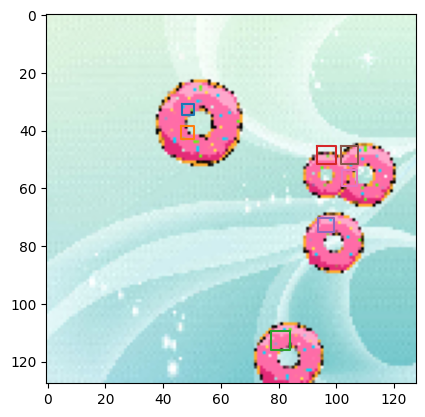

In [122]:
import numpy as np
import matplotlib.pyplot as plt
ind = int(np.random.randint(1,1000,1)[0])
x_t = X_test[ind:ind+1]
y_predict = model.predict(x_t)
# y_predict = y_test[ind:ind+1]
sigm = lambda x: 1/(1+np.e**(-x))
s = []
for x in range(16):
    for y in range(16):
        pred = y_predict[0][y,x]
        if pred[4] > 0.2:
            # print(pred,x*(128/16),y*(128/16))
            X = sigm(pred[0]) + x*(128/16)
            Y = sigm(pred[1]) + y*(128/16)
            W = 7*np.e**pred[2]
            H = 7*np.e**pred[3]
            s.append([[X-W/2,X+W/2,X+W/2,X-W/2,X-W/2],[Y-H/2,Y-H/2,Y+H/2,Y+H/2,Y-H/2]])

plt.imshow(x_t[0][:,:,::-1])
for i in range(len(s)):
    plt.plot(s[i][0],s[i][1])